# Homework II

## II. Programming and critical analysis [13v]

Considering the _column_diagnosis.arff_ dataset available at the course webpage’s homework tab. Using _sklearn_, apply a 10-fold stratified cross-validation with shuffling (_random_state=0_) for the assessment of predictive models along this section. 

1) [3v] Compare the performance of 𝑘NN with 𝑘 =5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as _sklearn_’s default):

a. Plot two boxplots with the fold accuracies for each classifier.  \
b. Using _scipy_, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding accuracy”, asserting whether is true.

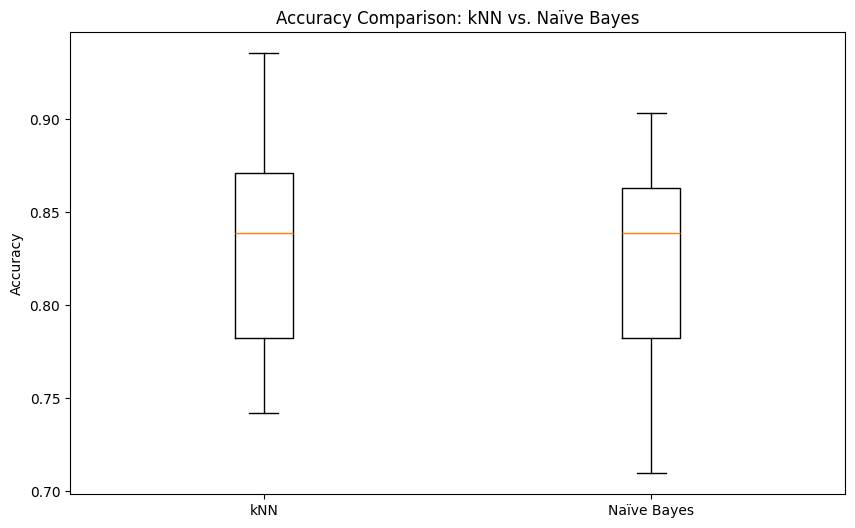

There is no statistically significant difference between kNN and Naïve Bayes (p-value=0.3809)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_rel
from sklearn.preprocessing import LabelEncoder

# Load the ARFF dataset
data, meta = arff.loadarff('column_diagnosis.arff')

# Convert the dataset to a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Extract features (X) and encode the target labels (y)
X = df.drop(columns=['class']).values
y = df['class'].str.decode('utf-8')  # Decoding binary strings
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Set random seed for reproducibility
random_seed = 0

# Define classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

# Define stratified 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)

# Perform cross-validation and collect accuracy scores
knn_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
nb_scores = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')

# Plot boxplots of the fold accuracies
plt.figure(figsize=(10, 6))
plt.boxplot([knn_scores, nb_scores], labels=['kNN', 'Naïve Bayes'])
plt.title('Accuracy Comparison: kNN vs. Naïve Bayes')
plt.ylabel('Accuracy')
plt.show()

# Perform a statistical test to compare the classifiers
t_statistic, p_value = ttest_rel(knn_scores, nb_scores)

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print(f"kNN is statistically superior to Naïve Bayes (p-value={p_value:.4f})")
else:
    print(f"There is no statistically significant difference between kNN and Naïve Bayes (p-value={p_value:.4f})")

2) [2.5v] Consider two 𝑘NN predictors with 𝑘=1 and 𝑘 =5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.

Matrix k=1:

Predicted   0   1    2
True                  
0          37  23    0
1          14  80    6
2           1   7  142
Matrix k=5:

Predicted   0   1    2
True                  
0          39  21    0
1          19  78    3
2           1   6  143

Difference Matrix (k=1 - k=5):
Predicted  0  1  2
True              
0         -2  2  0
1         -5  2  3
2          0  1 -1


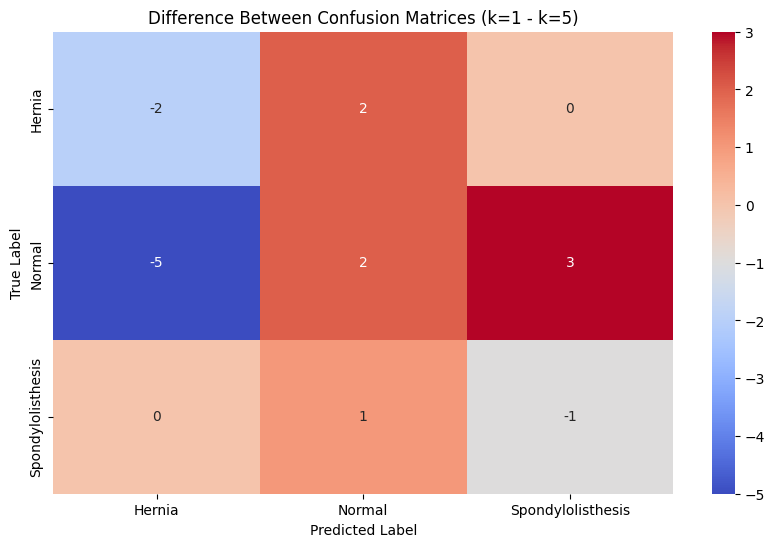

In [7]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ARFF dataset
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

# Ensure the 'class' column contains only valid class labels
df['class'] = df['class'].str.decode('utf-8')  # Convert bytes to strings

# Encode the 'class' column to numerical values
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split the dataset into features (X) and the target variable (y)
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable

# Create k-NN classifiers with k = 1 and k = 5
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Initialize StratifiedKFold with 10 folds and shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation and get predicted labels for each fold for k=1 and k=5
predicted_labels_1 = cross_val_predict(knn_1, X, y, cv=cv)
predicted_labels_5 = cross_val_predict(knn_5, X, y, cv=cv)

# Get the unique class names
class_names = le.classes_

# Calculate confusion matrices for both k-NN classifiers
confusion_matrix_1 = pd.crosstab(index=y, columns=predicted_labels_1, rownames=['True'], colnames=['Predicted'])
confusion_matrix_5 = pd.crosstab(index=y, columns=predicted_labels_5, rownames=['True'], colnames=['Predicted'])

# Calculate the difference between the two confusion matrices
difference_matrix = confusion_matrix_1 - confusion_matrix_5

# Print the difference matrix
print("Matrix k=1:\n")
print(confusion_matrix_1)
print("Matrix k=5:\n")
print(confusion_matrix_5)
print("\nDifference Matrix (k=1 - k=5):")
print(difference_matrix)

# Create a heatmap to visualize the differences
plt.figure(figsize=(10, 6))
sns.heatmap(difference_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Difference Between Confusion Matrices (k=1 - k=5)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.show()

&nbsp;&nbsp;Analisando os resultados vemos que quanto mais positivos forem os valores das células, concluimos que um k=1 é melhor que um k=5, no que toca a estimar a class do atributo em questão. Por outro lado, se o valor da célula for negativo tiramos uma conclusão semelhante, onde aqui o k preferível é o k=5. Nas células cinzentas , neutras sabemos que tanto o k=1 e o k=5 têm a mesma performance, sendo igual escolher um ou outro. Tendo em conta esta observação concluimos que não existe um k que seja universalmente ótimo, sendo preciso ter sempre em consideração vários dados, como as características dos dados, a natureza das classes, etc.

3) [1.5v] Considering the unique properties of column_diagnosis, identify three possible difficulties of naïve Bayes when learning from the given dataset.

Tendo em conta column_diagnosis, podemos identificar 3 possíveis dificuldades: 
1. Suposição de Independência de Características: O Naïve Bayes assume que as características são condicionalmente independentes dadas as classes. No entanto, no conjunto de dados "column_diagnosis", algumas características podem não ser inteiramente independentes. Por exemplo, medidas relacionadas à saúde da coluna, como 'pelvic_incidence' e 'pelvic_tilt', podem estar correlacionadas. Essa suposição de independência pode não ser verdadeira, o que pode afetar o desempenho do modelo. 
2. Características Contínuas: O Naïve Bayes foi projetado para lidar com dados discretos e características categóricas. Se o conjunto de dados contém características contínuas, como é comum em conjuntos de dados biomédicos, pode ser necessário discretizá-las para encaixá-las no framework do Naïve Bayes. A escolha do método de discretização pode afetar o desempenho do modelo, e uma discretização inadequada pode resultar na perda de informações. 
3. Limitação na Expressividade do Modelo: O Naïve Bayes é um classificador simples e linear. Ele pode não capturar relações complexas entre características nos dados. No conjunto de dados "column_diagnosis", pode haver padrões não lineares ou intrincados que o Naïve Bayes tem dificuldade em modelar eficazmente. Modelos mais avançados, como árvores de decisão, florestas aleatórias ou máquinas de vetores de suporte, podem ser mais adequados para capturar essas relações. 